Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 128061207.26it/s]


Extracting C:\Users\lokes\OneDrive\Desktop\deep/MNIST/raw/train-images-idx3-ubyte.gz to C:\Users\lokes\OneDrive\Desktop\deep/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 43340140.90it/s]

Extracting C:\Users\lokes\OneDrive\Desktop\deep/MNIST/raw/train-labels-idx1-ubyte.gz to C:\Users\lokes\OneDrive\Desktop\deep/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 92080517.08it/s]


Extracting C:\Users\lokes\OneDrive\Desktop\deep/MNIST/raw/t10k-images-idx3-ubyte.gz to C:\Users\lokes\OneDrive\Desktop\deep/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7697183.34it/s]

Extracting C:\Users\lokes\OneDrive\Desktop\deep/MNIST/raw/t10k-labels-idx1-ubyte.gz to C:\Users\lokes\OneDrive\Desktop\deep/MNIST/raw



Epoch 1/20, Train Loss: 2.3032, Test Loss: 2.3026
Epoch 2/20, Train Loss: 2.3030, Test Loss: 2.3025
Epoch 3/20, Train Loss: 2.3028, Test Loss: 2.3026
Epoch 4/20, Train Loss: 2.3025, Test Loss: 2.3027
Epoch 5/20, Train Loss: 2.3023, Test Loss: 2.3036
Epoch 6/20, Train Loss: 2.3017, Test Loss: 2.3031
Epoch 7/20, Train Loss: 2.3009, Test Loss: 2.3052
Epoch 8/20, Train Loss: 2.2993, Test Loss: 2.3067
Epoch 9/20, Train Loss: 2.2975, Test Loss: 2.3086
Epoch 10/20, Train Loss: 2.2942, Test Loss: 2.3108
Epoch 11/20, Train Loss: 2.2899, Test Loss: 2.3150
Epoch 12/20, Train Loss: 2.2842, Test Loss: 2.3178
Epoch 13/20, Train Loss: 2.2771, Test Loss: 2.3238
Epoch 14/20, Train Loss: 2.2668, Test Loss: 2.3334
Epoch 15/20, Train Loss: 2.2548, Test Loss: 2.3490
Epoch 16/20, Train Loss: 2.2397, Test Loss: 2.3578
Epoch 17/20, Train Loss: 2.2232, Test Loss: 2.3826
Epoch 18/20, Train Loss: 2.2045, Test Loss: 2.3932
Epoch 19/20, Train Loss: 2.1845, Test Loss: 2.4130
Epoch 20/20, Train Loss: 2.1630, Test Lo

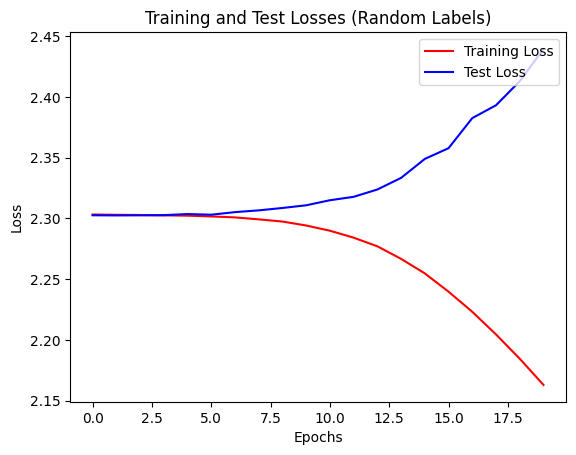

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Transform to convert images to tensors
data_transform = transforms.ToTensor()

# Load the MNIST dataset
train_data = datasets.MNIST(root='C:\\Users\\lokes\\OneDrive\\Desktop\\deep', train=True, download=True, transform=data_transform)
test_data = datasets.MNIST(root='C:\\Users\\lokes\\OneDrive\\Desktop\\deep', train=False, download=True, transform=data_transform)

# Randomly shuffle the labels in the training and test sets
random_train_labels = torch.tensor(np.random.randint(0, 10, size=(len(train_data),)))
train_data.targets = random_train_labels

random_test_labels = torch.tensor(np.random.randint(0, 10, size=(len(test_data),)))
test_data.targets = random_test_labels

# Create DataLoader objects
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

# Define a neural network model with 3 hidden layers of 256 nodes each
class CustomModel(nn.Module):
    def __init__(self, input_size=784, hidden_size=256, output_size=10):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        return x

# Instantiate the model
model = CustomModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 20
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for X_train, y_train in train_loader:
        # Flatten the images into 1D vectors of size 784 (28x28)
        X_train = X_train.view(-1, 28 * 28)

        # Forward pass: compute predictions and loss
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Backward pass: update model weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluate the model on the test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test = X_test.view(-1, 28 * 28)
            y_val = model(X_test)
            loss = criterion(y_val, y_test)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

# Plot the training and test losses over epochs
plt.plot(range(num_epochs), train_losses, 'r', label='Training Loss')
plt.plot(range(num_epochs), test_losses, 'b', label='Test Loss')
plt.title("Training and Test Losses (Random Labels)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()
